In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

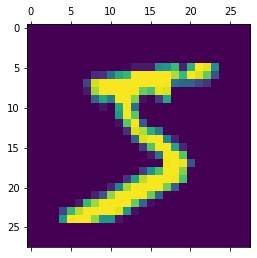

In [3]:
%matplotlib inline
plt.matshow(x_train[0])

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [6]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [7]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2762 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0636 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9763


[0.08866924792528152, 0.9763000011444092]

In [9]:
y_predicted = model.predict(x_test)
y_predicted_ = [np.argmax(i) for i in y_predicted]

In [10]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_)

<AxesSubplot:>

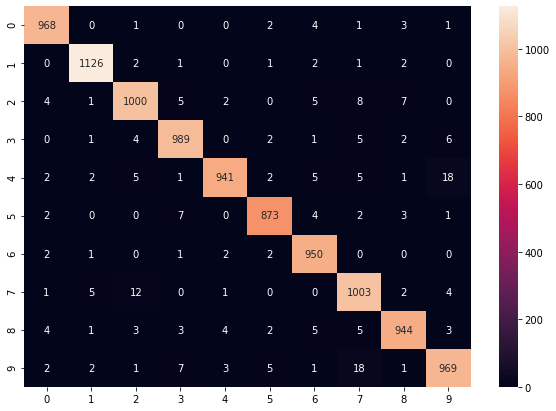

In [11]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')